In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [4]:
trainX = trainX.reshape(60000, 28, 28, 1)
testX = testX.reshape(10000, 28, 28, 1)

In [5]:
from keras.utils import np_utils

In [6]:
trainY = np_utils.to_categorical(trainY, 10)  #one-hot encoding, 變成使用0,1,00格式呈現
testY = np_utils.to_categorical(testY, 10)

In [7]:
trainX = trainX/255
testX = testX/255

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, Adadelta

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))

In [11]:
model.add(MaxPool2D(pool_size=(2,2)))

In [12]:
model.add(Conv2D(128, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))

In [13]:
model.add(MaxPool2D(pool_size=(2,2)))

In [14]:
#model.add(Conv2D(128, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))

In [15]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))

In [16]:
model.add(Dense(512, activation='relu'))

In [17]:
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(loss="categorical_crossentropy", optimizer=Adadelta(lr=0.25), metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [20]:
model.fit(trainX, trainY, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.6577 - accuracy: 0.7513
Epoch 2/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.3677 - accuracy: 0.8658
Epoch 3/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.3122 - accuracy: 0.8847
Epoch 4/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.2768 - accuracy: 0.8981
Epoch 5/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.2513 - accuracy: 0.9068
Epoch 6/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2314 - accuracy: 0.9145
Epoch 7/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.2124 - accuracy: 0.9220
Epoch 8/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1982 - accuracy: 0.9266
Epoch 9/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.1840 - accuracy: 0.9322
Epoch 10/10
60000/60000 [==============================

In [21]:
score = model.evaluate(testX, testY)

10000/10000 [==============================] - 3s 324us/step


In [22]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.24430
測試資料的正確率: 0.9157999753952026


In [23]:
model.save("CNNmodel_fashion")

In [24]:
del model

In [25]:
from keras.models import load_model

In [26]:
model = load_model('CNNmodel_fashion')

In [27]:
predict = model.predict_classes(testX)

In [28]:
labelNames = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

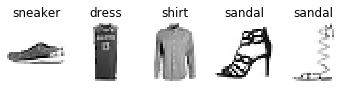

In [29]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(testX[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(labelNames[predict[pick[i]]])
    plt.axis("off")